In [345]:
import pandas as pd
import numpy as np

In [346]:
import json

# first data

In [347]:
file_path =r"C:\Users\VIVOBOOK\Desktop\!Space\multiqc_data.json"

with open(file_path, "r") as file:
    data = json.load(file)


In [348]:
data

{'report_data_sources': {'FastQC': {'all_sections': {'RR23_R-EDL_FLT_F9_R2_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_FLT_F9_R2_raw_fastqc.zip',
    'RR23_R-EDL_FLT_F2_R2_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_FLT_F2_R2_raw_fastqc.zip',
    'RR23_R-EDL_GC_G6_R1_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_GC_G6_R1_raw_fastqc.zip',
    'RR23_R-EDL_VIV_V5_R2_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_VIV_V5_R2_raw_fastqc.zip',
    'RR23_R-EDL_GC_G9_R2_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_GC_G9_R2_raw_fastqc.zip',
    'RR23_R-EDL_GC_G1_techrep1_R2_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_GC_G1_techrep1_R2_raw_fastqc.zip',
    'RR23_R-EDL_GC_G2_R2_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_GC_G2_R2_raw_fastqc.zip',
    'RR23_R-EDL_FLT_F6_R1_raw': '/OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR23_R-EDL_FLT_F6_R1_raw_fastqc.zip',
    'RR23_R-EDL_VIV_V

In [349]:
import json
import pandas as pd


fastqc_data = data['report_data_sources']['FastQC']['all_sections']
fastqc_df = pd.DataFrame(list(fastqc_data.items()), columns=['Sample', 'File Path'])


general_stats_data = data['report_general_stats_data'][0]
general_stats_df = pd.DataFrame(general_stats_data).T


general_stats_headers = data['report_general_stats_headers'][0]
headers_df = pd.DataFrame(general_stats_headers).T


sequence_counts = data['report_plot_data']['fastqc_sequence_counts_plot']['datasets'][0]



print("FastQC DataFrame:")
print(fastqc_df.head())

print("\nGeneral Stats DataFrame:")
print(general_stats_df.head())

print("\nGeneral Stats Headers DataFrame:")
print(headers_df.head())



FastQC DataFrame:
                     Sample                                          File Path
0  RR23_R-EDL_FLT_F9_R2_raw  /OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR...
1  RR23_R-EDL_FLT_F2_R2_raw  /OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR...
2   RR23_R-EDL_GC_G6_R1_raw  /OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR...
3  RR23_R-EDL_VIV_V5_R2_raw  /OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR...
4   RR23_R-EDL_GC_G9_R2_raw  /OSD-665_GLDS-604/00-RawData/FastQC_Reports/RR...

General Stats DataFrame:
                          percent_gc  avg_sequence_length  total_sequences  \
RR23_R-EDL_FLT_F9_R2_raw        45.0                151.0       98082584.0   
RR23_R-EDL_FLT_F2_R2_raw        44.0                151.0       94177785.0   
RR23_R-EDL_GC_G6_R1_raw         45.0                151.0       90677361.0   
RR23_R-EDL_VIV_V5_R2_raw        45.0                151.0      109488221.0   
RR23_R-EDL_GC_G9_R2_raw         45.0                151.0      106644836.0   

             

<Figure size 1000x600 with 0 Axes>

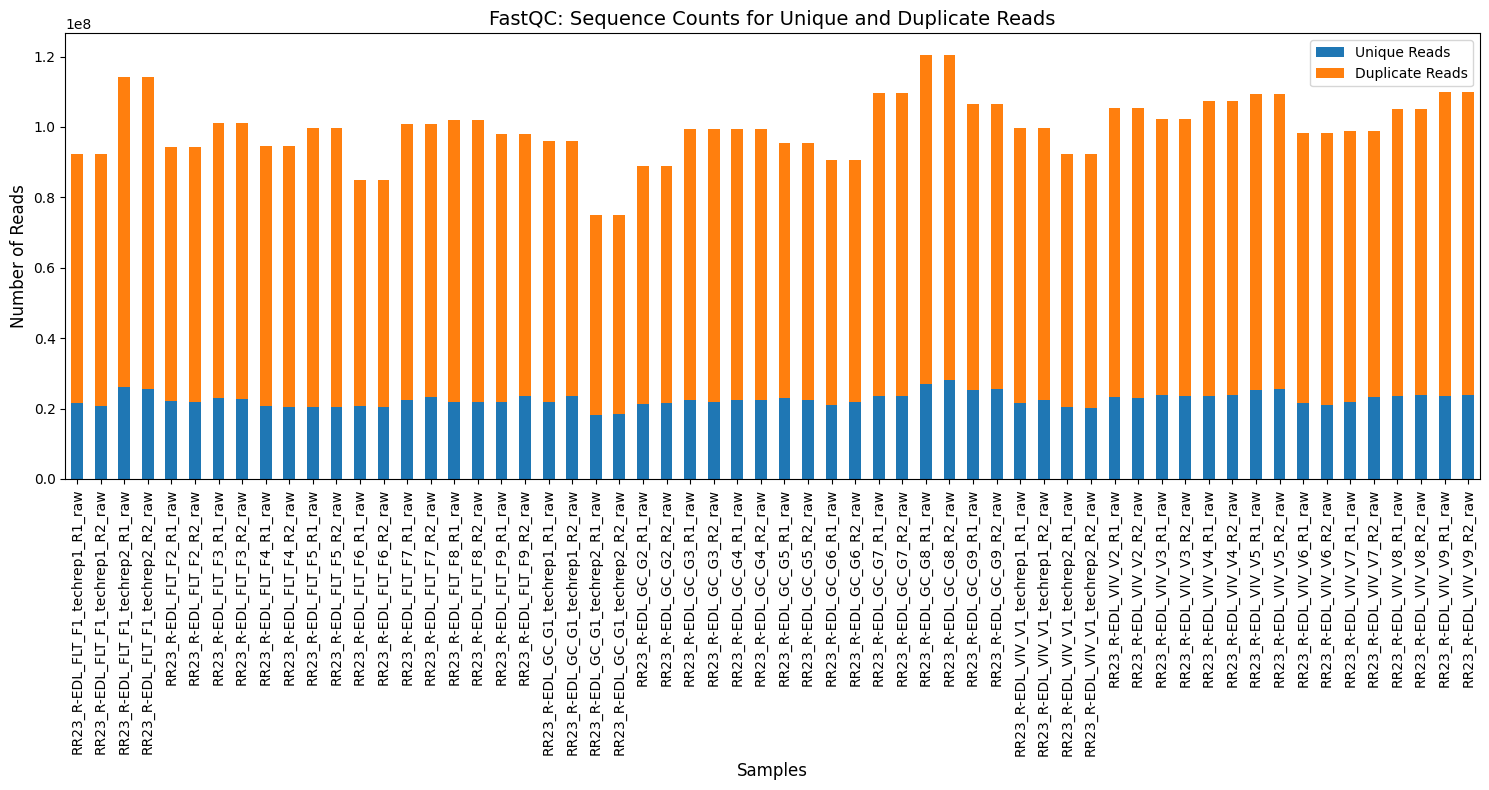

In [350]:
import matplotlib.pyplot as plt

samples = data['report_plot_data']['fastqc_sequence_counts_plot']['samples'][0]
unique_reads = data['report_plot_data']['fastqc_sequence_counts_plot']['datasets'][0][0]['data']
duplicate_reads = data['report_plot_data']['fastqc_sequence_counts_plot']['datasets'][0][1]['data']


df = pd.DataFrame({
    'Sample': samples,
    'Unique Reads': unique_reads,
    'Duplicate Reads': duplicate_reads
})


plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='Sample', y=['Unique Reads', 'Duplicate Reads'], stacked=True, figsize=(15, 8))


plt.title('FastQC: Sequence Counts for Unique and Duplicate Reads', fontsize=14)
plt.ylabel('Number of Reads', fontsize=12)
plt.xlabel('Samples', fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [351]:
raw_data = data['report_saved_raw_data']['multiqc_fastqc']

raw_df = pd.DataFrame.from_dict(raw_data, orient='index').reset_index()

raw_df.rename(columns={'index': 'Mice'}, inplace=True)

raw_df.head()

,Mice,Filename,File type,Encoding,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,total_deduplicated_percentage,avg_sequence_length,...,per_base_sequence_quality,per_tile_sequence_quality,per_sequence_quality_scores,per_base_sequence_content,per_sequence_gc_content,per_base_n_content,sequence_length_distribution,sequence_duplication_levels,overrepresented_sequences,adapter_content
0,RR23_R-EDL_FLT_F9_R2_raw,RR23_R-EDL_FLT_F9_R2_raw.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,98082584.0,0.0,151.0,45.0,24.100431,151.0,...,pass,fail,pass,fail,warn,pass,pass,fail,warn,warn
1,RR23_R-EDL_FLT_F2_R2_raw,RR23_R-EDL_FLT_F2_R2_raw.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,94177785.0,0.0,151.0,44.0,23.297051,151.0,...,pass,fail,pass,fail,warn,pass,pass,fail,warn,warn
2,RR23_R-EDL_GC_G6_R1_raw,RR23_R-EDL_GC_G6_R1_raw.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,90677361.0,0.0,151.0,45.0,23.131119,151.0,...,pass,warn,pass,warn,warn,pass,pass,fail,warn,fail
3,RR23_R-EDL_VIV_V5_R2_raw,RR23_R-EDL_VIV_V5_R2_raw.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,109488221.0,0.0,151.0,45.0,23.282891,151.0,...,pass,fail,pass,fail,pass,pass,pass,fail,warn,warn
4,RR23_R-EDL_GC_G9_R2_raw,RR23_R-EDL_GC_G9_R2_raw.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,106644836.0,0.0,151.0,45.0,24.024820,151.0,...,pass,fail,pass,fail,warn,pass,pass,fail,warn,warn


In [352]:
raw_df.columns


Index(['Mice', 'Filename', 'File type', 'Encoding', 'Total Sequences',
       'Sequences flagged as poor quality', 'Sequence length', '%GC',
       'total_deduplicated_percentage', 'avg_sequence_length',
       'basic_statistics', 'per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content'],
      dtype='object')

In [353]:
df=raw_df.drop(['Filename', 'File type', 'Encoding'],axis=1)

In [354]:
df.columns

Index(['Mice', 'Total Sequences', 'Sequences flagged as poor quality',
       'Sequence length', '%GC', 'total_deduplicated_percentage',
       'avg_sequence_length', 'basic_statistics', 'per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content'],
      dtype='object')

In [355]:
df.columns

Index(['Mice', 'Total Sequences', 'Sequences flagged as poor quality',
       'Sequence length', '%GC', 'total_deduplicated_percentage',
       'avg_sequence_length', 'basic_statistics', 'per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content'],
      dtype='object')

#second data


In [356]:
general_stats = data['report_general_stats_data'][0]  


df2 = pd.DataFrame.from_dict(general_stats, orient='index')

df2

,percent_gc,avg_sequence_length,total_sequences,percent_duplicates,percent_fails
RR23_R-EDL_FLT_F9_R2_raw,45.0,151.0,98082584.0,75.899569,27.272727
RR23_R-EDL_FLT_F2_R2_raw,44.0,151.0,94177785.0,76.702949,27.272727
RR23_R-EDL_GC_G6_R1_raw,45.0,151.0,90677361.0,76.868881,18.181818
RR23_R-EDL_VIV_V5_R2_raw,45.0,151.0,109488221.0,76.717109,27.272727
RR23_R-EDL_GC_G9_R2_raw,45.0,151.0,106644836.0,75.975180,27.272727
RR23_R-EDL_GC_G1_techrep1_R2_raw,45.0,151.0,95997670.0,75.494716,36.363636
RR23_R-EDL_GC_G2_R2_raw,45.0,151.0,88793810.0,75.775161,36.363636
RR23_R-EDL_FLT_F6_R1_raw,44.0,151.0,84970334.0,75.542909,18.181818
RR23_R-EDL_VIV_V8_R2_raw,45.0,151.0,105155249.0,77.405477,36.363636
RR23_R-EDL_GC_G4_R2_raw,44.0,151.0,99327571.0,77.428615,27.272727


In [357]:
def classify_sample(sample_name):
    if 'GC' in sample_name:
        return 'GC'
    elif 'VIV' in sample_name:
        return 'VIV'
    elif 'FLT' in sample_name:
        return 'FLT'
    else:
        return 'Unknown'

df2 = df2[~df2.index.str.contains('techrep2')]

df2['mice_type'] = df2.index.map(classify_sample)

C:\Users\VIVOBOOK\AppData\Local\Temp\ipykernel_22024\854590384.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [358]:
df2=df2.sort_values(by='mice_type')
df2

,percent_gc,avg_sequence_length,total_sequences,percent_duplicates,percent_fails,mice_type
RR23_R-EDL_FLT_F9_R2_raw,45.0,151.0,98082584.0,75.899569,27.272727,FLT
RR23_R-EDL_FLT_F7_R2_raw,45.0,151.0,100730339.0,76.868352,36.363636,FLT
RR23_R-EDL_FLT_F5_R1_raw,44.0,151.0,99664082.0,79.419628,18.181818,FLT
RR23_R-EDL_FLT_F2_R1_raw,44.0,151.0,94177785.0,76.465782,18.181818,FLT
RR23_R-EDL_FLT_F9_R1_raw,45.0,151.0,98082584.0,77.838730,9.090909,FLT
RR23_R-EDL_FLT_F6_R2_raw,44.0,151.0,84970334.0,75.773477,36.363636,FLT
RR23_R-EDL_FLT_F4_R1_raw,44.0,151.0,94696022.0,78.149121,9.090909,FLT
RR23_R-EDL_FLT_F1_techrep1_R1_raw,45.0,151.0,92435321.0,76.566002,9.090909,FLT
RR23_R-EDL_FLT_F3_R1_raw,44.0,151.0,101168454.0,77.355059,9.090909,FLT
RR23_R-EDL_FLT_F7_R1_raw,45.0,151.0,100730339.0,77.605462,18.181818,FLT


In [359]:
df2 = df2.reset_index()
df2


,index,percent_gc,avg_sequence_length,total_sequences,percent_duplicates,percent_fails,mice_type
0,RR23_R-EDL_FLT_F9_R2_raw,45.0,151.0,98082584.0,75.899569,27.272727,FLT
1,RR23_R-EDL_FLT_F7_R2_raw,45.0,151.0,100730339.0,76.868352,36.363636,FLT
2,RR23_R-EDL_FLT_F5_R1_raw,44.0,151.0,99664082.0,79.419628,18.181818,FLT
3,RR23_R-EDL_FLT_F2_R1_raw,44.0,151.0,94177785.0,76.465782,18.181818,FLT
4,RR23_R-EDL_FLT_F9_R1_raw,45.0,151.0,98082584.0,77.838730,9.090909,FLT
5,RR23_R-EDL_FLT_F6_R2_raw,44.0,151.0,84970334.0,75.773477,36.363636,FLT
6,RR23_R-EDL_FLT_F4_R1_raw,44.0,151.0,94696022.0,78.149121,9.090909,FLT
7,RR23_R-EDL_FLT_F1_techrep1_R1_raw,45.0,151.0,92435321.0,76.566002,9.090909,FLT
8,RR23_R-EDL_FLT_F3_R1_raw,44.0,151.0,101168454.0,77.355059,9.090909,FLT
9,RR23_R-EDL_FLT_F7_R1_raw,45.0,151.0,100730339.0,77.605462,18.181818,FLT


# two datasets summed

In [360]:
import pandas as pd
merged_df = pd.merge(df, df2, left_on='Mice', right_on='index', how='inner')

In [361]:
merged_df.head()

,Mice,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,total_deduplicated_percentage,avg_sequence_length_x,basic_statistics,per_base_sequence_quality,per_tile_sequence_quality,...,sequence_duplication_levels,overrepresented_sequences,adapter_content,index,percent_gc,avg_sequence_length_y,total_sequences,percent_duplicates,percent_fails,mice_type
0,RR23_R-EDL_FLT_F9_R2_raw,98082584.0,0.0,151.0,45.0,24.100431,151.0,pass,pass,fail,...,fail,warn,warn,RR23_R-EDL_FLT_F9_R2_raw,45.0,151.0,98082584.0,75.899569,27.272727,FLT
1,RR23_R-EDL_FLT_F2_R2_raw,94177785.0,0.0,151.0,44.0,23.297051,151.0,pass,pass,fail,...,fail,warn,warn,RR23_R-EDL_FLT_F2_R2_raw,44.0,151.0,94177785.0,76.702949,27.272727,FLT
2,RR23_R-EDL_GC_G6_R1_raw,90677361.0,0.0,151.0,45.0,23.131119,151.0,pass,pass,warn,...,fail,warn,fail,RR23_R-EDL_GC_G6_R1_raw,45.0,151.0,90677361.0,76.868881,18.181818,GC
3,RR23_R-EDL_VIV_V5_R2_raw,109488221.0,0.0,151.0,45.0,23.282891,151.0,pass,pass,fail,...,fail,warn,warn,RR23_R-EDL_VIV_V5_R2_raw,45.0,151.0,109488221.0,76.717109,27.272727,VIV
4,RR23_R-EDL_GC_G9_R2_raw,106644836.0,0.0,151.0,45.0,24.024820,151.0,pass,pass,fail,...,fail,warn,warn,RR23_R-EDL_GC_G9_R2_raw,45.0,151.0,106644836.0,75.975180,27.272727,GC


In [362]:
merged_df.drop(['index','total_sequences','avg_sequence_length_x','%GC'], axis=1, inplace=True)

In [363]:
merged_df.columns

Index(['Mice', 'Total Sequences', 'Sequences flagged as poor quality',
       'Sequence length', 'total_deduplicated_percentage', 'basic_statistics',
       'per_base_sequence_quality', 'per_tile_sequence_quality',
       'per_sequence_quality_scores', 'per_base_sequence_content',
       'per_sequence_gc_content', 'per_base_n_content',
       'sequence_length_distribution', 'sequence_duplication_levels',
       'overrepresented_sequences', 'adapter_content', 'percent_gc',
       'avg_sequence_length_y', 'percent_duplicates', 'percent_fails',
       'mice_type'],
      dtype='object')

In [364]:
merged_df.head()

,Mice,Total Sequences,Sequences flagged as poor quality,Sequence length,total_deduplicated_percentage,basic_statistics,per_base_sequence_quality,per_tile_sequence_quality,per_sequence_quality_scores,per_base_sequence_content,...,per_base_n_content,sequence_length_distribution,sequence_duplication_levels,overrepresented_sequences,adapter_content,percent_gc,avg_sequence_length_y,percent_duplicates,percent_fails,mice_type
0,RR23_R-EDL_FLT_F9_R2_raw,98082584.0,0.0,151.0,24.100431,pass,pass,fail,pass,fail,...,pass,pass,fail,warn,warn,45.0,151.0,75.899569,27.272727,FLT
1,RR23_R-EDL_FLT_F2_R2_raw,94177785.0,0.0,151.0,23.297051,pass,pass,fail,pass,fail,...,pass,pass,fail,warn,warn,44.0,151.0,76.702949,27.272727,FLT
2,RR23_R-EDL_GC_G6_R1_raw,90677361.0,0.0,151.0,23.131119,pass,pass,warn,pass,warn,...,pass,pass,fail,warn,fail,45.0,151.0,76.868881,18.181818,GC
3,RR23_R-EDL_VIV_V5_R2_raw,109488221.0,0.0,151.0,23.282891,pass,pass,fail,pass,fail,...,pass,pass,fail,warn,warn,45.0,151.0,76.717109,27.272727,VIV
4,RR23_R-EDL_GC_G9_R2_raw,106644836.0,0.0,151.0,24.024820,pass,pass,fail,pass,fail,...,pass,pass,fail,warn,warn,45.0,151.0,75.975180,27.272727,GC


In [365]:
# prompt: number fo unique values in each column

# Loop through each column and print the number of unique values
for column in merged_df.columns:
  print(f"Column '{column}' has {merged_df[column].nunique()} unique values.")


Column 'Mice' has 54 unique values.
Column 'Total Sequences' has 27 unique values.
Column 'Sequences flagged as poor quality' has 1 unique values.
Column 'Sequence length' has 1 unique values.
Column 'total_deduplicated_percentage' has 54 unique values.
Column 'basic_statistics' has 1 unique values.
Column 'per_base_sequence_quality' has 1 unique values.
Column 'per_tile_sequence_quality' has 2 unique values.
Column 'per_sequence_quality_scores' has 1 unique values.
Column 'per_base_sequence_content' has 2 unique values.
Column 'per_sequence_gc_content' has 2 unique values.
Column 'per_base_n_content' has 1 unique values.
Column 'sequence_length_distribution' has 1 unique values.
Column 'sequence_duplication_levels' has 1 unique values.
Column 'overrepresented_sequences' has 1 unique values.
Column 'adapter_content' has 2 unique values.
Column 'percent_gc' has 3 unique values.
Column 'avg_sequence_length_y' has 1 unique values.
Column 'percent_duplicates' has 54 unique values.
Column '

In [366]:
merged_df.drop(['Sequences flagged as poor quality','Sequence length','basic_statistics','per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','sequence_length_distribution','sequence_duplication_levels','overrepresented_sequences','avg_sequence_length_y'], axis=1,inplace=True)

In [367]:
merged_df.head()

,Mice,Total Sequences,total_deduplicated_percentage,per_tile_sequence_quality,per_base_sequence_content,per_sequence_gc_content,adapter_content,percent_gc,percent_duplicates,percent_fails,mice_type
0,RR23_R-EDL_FLT_F9_R2_raw,98082584.0,24.100431,fail,fail,warn,warn,45.0,75.899569,27.272727,FLT
1,RR23_R-EDL_FLT_F2_R2_raw,94177785.0,23.297051,fail,fail,warn,warn,44.0,76.702949,27.272727,FLT
2,RR23_R-EDL_GC_G6_R1_raw,90677361.0,23.131119,warn,warn,warn,fail,45.0,76.868881,18.181818,GC
3,RR23_R-EDL_VIV_V5_R2_raw,109488221.0,23.282891,fail,fail,pass,warn,45.0,76.717109,27.272727,VIV
4,RR23_R-EDL_GC_G9_R2_raw,106644836.0,24.024820,fail,fail,warn,warn,45.0,75.975180,27.272727,GC


In [368]:
merged_df.columns

Index(['Mice', 'Total Sequences', 'total_deduplicated_percentage',
       'per_tile_sequence_quality', 'per_base_sequence_content',
       'per_sequence_gc_content', 'adapter_content', 'percent_gc',
       'percent_duplicates', 'percent_fails', 'mice_type'],
      dtype='object')

#visualization

In [369]:
merged_df.head()

,Mice,Total Sequences,total_deduplicated_percentage,per_tile_sequence_quality,per_base_sequence_content,per_sequence_gc_content,adapter_content,percent_gc,percent_duplicates,percent_fails,mice_type
0,RR23_R-EDL_FLT_F9_R2_raw,98082584.0,24.100431,fail,fail,warn,warn,45.0,75.899569,27.272727,FLT
1,RR23_R-EDL_FLT_F2_R2_raw,94177785.0,23.297051,fail,fail,warn,warn,44.0,76.702949,27.272727,FLT
2,RR23_R-EDL_GC_G6_R1_raw,90677361.0,23.131119,warn,warn,warn,fail,45.0,76.868881,18.181818,GC
3,RR23_R-EDL_VIV_V5_R2_raw,109488221.0,23.282891,fail,fail,pass,warn,45.0,76.717109,27.272727,VIV
4,RR23_R-EDL_GC_G9_R2_raw,106644836.0,24.024820,fail,fail,warn,warn,45.0,75.975180,27.272727,GC


# plots

In [370]:
!pip install plotly



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [371]:
!pip install ipywidgets



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [372]:
import ipywidgets as widgets
!pip install plotly
import plotly.express as px


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [373]:
y_axis_limits = {
    'Total Sequences': (80000000, 125000000),
    'total_deduplicated_percentage': (20, 25),
    'percent_duplicates': (74, 80),
}

color_map = {
    'FLT': '#f9e79f',  
    'GC': '#a9cce3',   
    'VIV': '#99a3a4',  
}


app = dash.Dash(__name__)


app.layout = html.Div([
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[
            {'label': 'Total Sequences', 'value': 'Total Sequences'},
            {'label': 'Total Deduplicated Percentage', 'value': 'total_deduplicated_percentage'},
            {'label': 'Percent Duplicates', 'value': 'percent_duplicates'},
        ],
        value='Total Sequences',  
        clearable=False
    ),
    dcc.Graph(id='bar-plot')
])


@app.callback(
    Output('bar-plot', 'figure'),
    Input('y-axis-dropdown', 'value')
)
def update_plot(y_axis):
    
    sorted_df = merged_df.sort_values(by='Mice')

    
    fig = px.bar(sorted_df, x='Mice', y=y_axis, title=f"Bar Plot of {y_axis} by Mice",
                 labels={y_axis: y_axis, 'Mice': 'Mice'},
                 height=800, color='mice_type', color_discrete_map=color_map)

   
    fig.update_layout(xaxis_title="Mice Names", yaxis_title=y_axis,
                      hovermode="x unified",
                      plot_bgcolor='rgba(0,0,0,0)',
                      yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgrey'))

    
    y_limits = y_axis_limits[y_axis]
    fig.update_yaxes(range=y_limits)

    return fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

In [374]:
merged_df['percent_gc'] = merged_df['percent_gc'].astype(str)
merged_df['percent_fails']=merged_df['percent_fails'].astype(str)

In [375]:
columns_to_plot = ['per_tile_sequence_quality', 'per_base_sequence_content',
                   'per_sequence_gc_content', 'adapter_content', 'percent_gc', 'percent_fails']


app = dash.Dash(__name__)


app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in columns_to_plot],
        value=columns_to_plot[0],  # Default value
        clearable=False,
    ),
    dcc.Graph(id='frequency-plot')
])


def generate_color_map(selected_column):
    unique_values = merged_df[selected_column].unique()
    colors = ['#f9e79f', '#a9cce3', '#99a3a4', '#f5b7b1', '#76d7c4', '#ffcc00']  
    return {value: colors[i % len(colors)] for i, value in enumerate(unique_values)}


@app.callback(
    Output('frequency-plot', 'figure'),
    Input('column-dropdown', 'value')
)
def update_plot(selected_column):
    
    frequency_df = merged_df.groupby(['mice_type', selected_column]).size().reset_index(name='Frequency')
    
    
    color_map = generate_color_map(selected_column)

    
    fig = px.bar(
        frequency_df,
        x='mice_type',         
        y='Frequency',         
        color=selected_column,  
        title=f"Frequency of {selected_column} by Mice Type",
        labels={'Frequency': 'Count', 'mice_type': 'Mice Type'},
        height=600,
        color_discrete_map=color_map  
    )

    
    fig.update_layout(
        barmode='group',  
        xaxis_title='Mice Type',
        yaxis_title='Count',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8053)

In [376]:
y_axis_limits = {
    'Total Sequences': (94000000, 106000000),
    'total_deduplicated_percentage': (21, 24),
    'percent_duplicates': (75, 79),
}


color_map = {
    'FLT': '#f9e79f',  
    'GC': '#a9cce3',   
    'VIV': '#99a3a4', 
}


app = dash.Dash(__name__)


app.layout = html.Div([
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[
            {'label': 'Total Sequences', 'value': 'Total Sequences'},
            {'label': 'Total Deduplicated Percentage', 'value': 'total_deduplicated_percentage'},
            {'label': 'Percent Duplicates', 'value': 'percent_duplicates'},
        ],
        value='Total Sequences',  
        clearable=False,
    ),
    dcc.Graph(id='bar-plot')
])


@app.callback(
    Output('bar-plot', 'figure'),
    Input('y-axis-dropdown', 'value')
)
def update_plot(y_axis):
    
    mean_df = merged_df.groupby('mice_type')[y_axis].mean().reset_index()
    mean_df.columns = ['Mice', y_axis] 

    
    fig = px.bar(mean_df, x='Mice', y=y_axis, title=f"Mean {y_axis} by Mice",
                 labels={y_axis: y_axis, 'Mice': 'Mice'},
                 height=800, color='Mice', color_discrete_map=color_map)

    
    fig.update_layout(xaxis_title="Mice Names", yaxis_title=y_axis,
                      hovermode="x unified",
                      plot_bgcolor='rgba(0,0,0,0)',
                      yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgrey'))

    
    y_limits = y_axis_limits[y_axis]
    fig.update_yaxes(range=y_limits)

    return fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8054)